# ADP 실기 23회

# 문제 1
### 온,습도,조도,CO2농도에 따른 객실의 사용유무 판별 종속변수 Occupancy, 0: 비어있음 , 1: 사용중

### 문제 1-1 데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data2/ADP_23/problem1.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
1,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
3,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
4,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17910 non-null  object 
 1   Temperature    17910 non-null  float64
 2   Humidity       17910 non-null  float64
 3   Light          17910 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17910 non-null  float64
 6   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 979.6+ KB


In [4]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [5]:
plt.bar

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

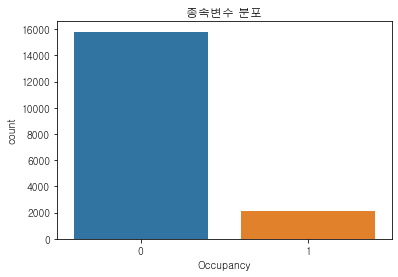

In [6]:
sns.countplot(df['Occupancy'])
plt.title('종속변수 분포')
plt.show()
# 종속변수 시각화 결과 데이터 불균형문제가 확인된다.

In [7]:
df_cor = df.corr(method='pearson')
df_cor

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.199284,0.625230,0.399370,0.138071,0.453281
Humidity,-0.199284,1.000000,-0.052119,0.254446,0.941568,0.032376
Light,0.625230,-0.052119,1.000000,0.354062,0.163272,0.867240
CO2,0.399370,0.254446,0.354062,1.000000,0.409735,0.409959
HumidityRatio,0.138071,0.941568,0.163272,0.409735,1.000000,0.198232
Occupancy,0.453281,0.032376,0.867240,0.409959,0.198232,1.000000


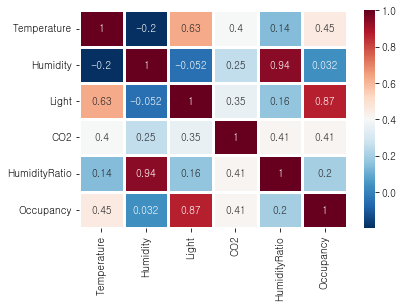

In [8]:
df_cor = df.corr(method='pearson')
sns.heatmap(df_cor,
           xticklabels=df_cor.columns,
           yticklabels=df_cor.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=3)
plt.show()
# 시각화 결과 독립변수끼리의 상관관계를 확인해본 결과 Humidity,HumidityRatio 변수끼리의 상관관계가 0.94로 나왔다.
# 변수 확인결과 습기와 습기의 비율로 확인됐다. 추후 변수 활용시 둘중 하나만 사용해도 무방하다고 판단된다.

In [9]:
df[['Humidity','HumidityRatio']]

,Humidity,HumidityRatio
0,26.2900,0.004773
1,26.1250,0.004744
2,26.2000,0.004767
3,26.2600,0.004779
4,26.2900,0.004783
...,...,...
17905,26.7675,0.004061
17906,26.7450,0.004058
17907,27.7175,0.004213
17908,27.7450,0.004230


In [10]:
df.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [11]:
df1 = df.drop(columns=['Occupancy','date'])
df1 = pd.melt(df1, var_name='col', value_name='value')
df1

,col,value
0,Temperature,23.718000
1,Temperature,23.722500
2,Temperature,23.754000
3,Temperature,23.760000
4,Temperature,23.754000
...,...,...
89545,HumidityRatio,0.004061
89546,HumidityRatio,0.004058
89547,HumidityRatio,0.004213
89548,HumidityRatio,0.004230


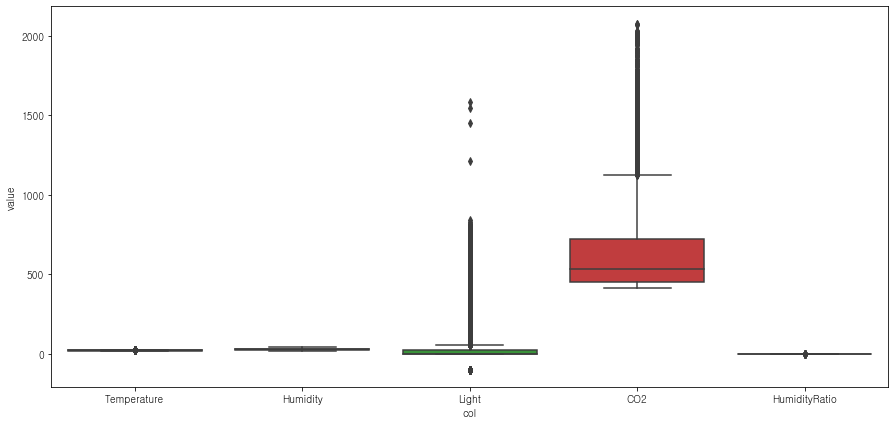

In [12]:
plt.figure(figsize=(15,7))
sns.boxplot(x='col',y='value',data=df1)
plt.show()
# 이상치 확인 결과 Light변수와 co2 변수에 이상치가 발견됐다.
# Light 변수의 경우의 음수 값도 존재하는 것으로 보이고 이상치 중에 연속적이지 않은 데이터들이 보이므로 추후 모델링 과정전에 처리한다.
# co2 변수의 경우 이상치들이 연속적으로 이어져 있기 때문에 실제로 존재하는 데이터일 가능성이 있으므로 현업의 의견이 필요하다.
# 따라서 Light 변수의 이상치들만 처리하겠다.

### 문제 1-2 결측치를 대체하는 방식 선택하고 근거제시, 대체 수행

In [13]:
df.isna().sum()

date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64

In [14]:
print('CO2 변수의 결측치 비율: {}%'.format(round(21/len(df)*100,2)))
# 결측치는 CO2변수에만 21개 존재하고 결측치율이 1%미만으로 삭제해도 무방하다고 판단하고 삭제한다.

CO2 변수의 결측치 비율: 0.12%


In [15]:
df.dropna(subset=['CO2'],axis=0,inplace=True)
df.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

### 1 - 3추가적으로 데이터의 질 및 품질관리를 향상시킬만한 내용 작성

In [16]:
# Light 변수의 0 미만의 값으로 입력된 데이터는 이상치라고 판단되고 삭제한다. 
# 1000 이상의 변수들도 4개 정도 보이지만 연속적이 형태를 보이므로 현업의 의견이 필요한 것으로 판단되고 0미만의 값만 대체한다.

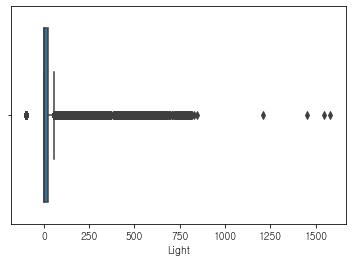

In [17]:
sns.boxplot(df['Light'])
plt.show()

In [18]:
out_lier = df[df.Light<0].index
df.loc[out_lier,'Light']=0

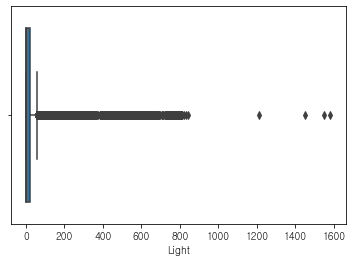

In [19]:
sns.boxplot(df['Light'])
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17889 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17889 non-null  object 
 1   Temperature    17889 non-null  float64
 2   Humidity       17889 non-null  float64
 3   Light          17889 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17889 non-null  float64
 6   Occupancy      17889 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.6+ MB


### 2 - (1) 데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성

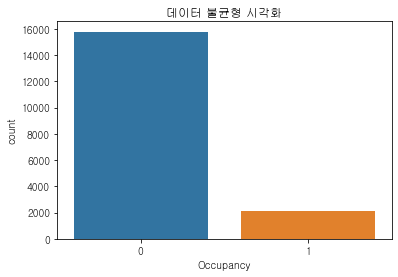

0의 비율: 88.27
1의 비율: 11.73


In [21]:
sns.countplot(x='Occupancy', data=df)
plt.title('데이터 불균형 시각화')
plt.show()
print('0의 비율: {}'.format(round(len(df[df.Occupancy==0])/len(df)*100,2)))
print('1의 비율: {}'.format(round(len(df[df.Occupancy==1])/len(df)*100,2)))
# Occupancy 데이터의 0의 비율이 88% 1의 비율이 11%로 데이터 불균형이 있다.

### 2 - (2) 오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시

### 2-(3) 오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라\

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17889 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17889 non-null  object 
 1   Temperature    17889 non-null  float64
 2   Humidity       17889 non-null  float64
 3   Light          17889 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17889 non-null  float64
 6   Occupancy      17889 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.6+ MB


In [23]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
X = df.drop(columns=['Occupancy','date'])
y = df[['Occupancy']]

ros = RandomOverSampler(random_state=1)
X_ro, y_ro = ros.fit_resample(X,y)
print('0의 비율: {}'.format(round(len(y_ro[y_ro.Occupancy==0])/len(y_ro)*100,2)))
print('1의 비율: {}'.format(round(len(y_ro[y_ro.Occupancy==1])/len(y_ro)*100,2)))

0의 비율: 50.0
1의 비율: 50.0


In [24]:
sm = SMOTE(random_state=1)
X_sm, y_sm = sm.fit_resample(X,y)
print('0의 비율: {}'.format(round(len(y_sm[y_sm.Occupancy==0])/len(y_sm)*100,2)))
print('1의 비율: {}'.format(round(len(y_sm[y_sm.Occupancy==1])/len(y_sm)*100,2)))

0의 비율: 50.0
1의 비율: 50.0


### 3 - (1) 속도측면, 정확도측면 모델 1개씩 선택, 선택 이유도 기술

### 3 - (2) 위에서 오버샘플링 한 데이터 2개, 오버샘플링 하기 전 데이터 1개에 대해 모델 2개를 적용하고 성능 보여주기

In [35]:
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [41]:
# 오버샘플링하기전 데이터
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.3, stratify=y, random_state=1)
scaler = StandardScaler()

scaler.fit(X_train)
X_train_sc= scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# 랜덤포레스트
start = time.time()
rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
rf.fit(X_train_sc,y_train)
print("랜덤포레스트 roc_auc_score:", roc_auc_score(y_test, rf.predict(X_test)))
print("랜덤포레크스 정확도:", accuracy_score(y_test,rf.predict(X_test)))
print("시간:", time.time()-start)
# 로지스틱
start=time.time()
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
print("로지스틱 roc_auc_score:", roc_auc_score(y_test,lr.predict(X_test)))
print('로직스틱 정확도:', accuracy_score(y_test,lr.predict(X_test)))
print('시간:', time.time()-start)

랜덤포레스트 roc_auc_score: 0.9049991455311278
랜덤포레크스 정확도: 0.8347307620644681
시간: 1.4028780460357666
로지스틱 roc_auc_score: 0.5
로직스틱 정확도: 0.11738401341531582
시간: 0.029918670654296875


In [56]:
# 랜덤오버샘플링
X_ro_train, X_ro_test, y_ro_train,y_ro_test = train_test_split(X_ro,y_ro, test_size= 0.3, stratify=y_ro, random_state=1)
scaler = StandardScaler()

scaler.fit(X_ro_train)
X_ro_train_sc= scaler.transform(X_ro_train)
X_ro_test_sc = scaler.transform(X_ro_test)

# 랜덤포레스트
start = time.time()
rf_ro = RandomForestClassifier(n_estimators=100, min_samples_split=10)
rf_ro.fit(X_ro_train_sc,y_ro_train)
print("랜덤포레스트 roc_auc_score:", roc_auc_score(y_ro_test, rf_ro.predict(X_ro_test)))
print("랜덤포레크스 정확도:", accuracy_score(y_ro_test,rf_ro.predict(X_ro_test)))
print("시간:", time.time()-start)
# 로지스틱
start=time.time()
lr_ro = LogisticRegression()
lr_ro.fit(X_ro_train_sc, y_ro_train)
print("로지스틱 roc_auc_score:", roc_auc_score(y_ro_test,lr_ro.predict(X_ro_test)))
print('로직스틱 정확도:', accuracy_score(y_ro_test,lr_ro.predict(X_ro_test)))
print('시간:', time.time()-start)

랜덤포레스트 roc_auc_score: 0.5
랜덤포레크스 정확도: 0.5
시간: 2.655630350112915
로지스틱 roc_auc_score: 0.5
로직스틱 정확도: 0.5
시간: 0.06379985809326172


In [46]:
# 랜덤오버샘플링
X_sm_train, X_sm_test, y_sm_train,y_sm_test = train_test_split(X_sm,y_sm, test_size= 0.3, stratify=y_sm, random_state=1)
scaler = StandardScaler()

scaler.fit(X_sm_train)
X_sm_train_sc= scaler.transform(X_sm_train)
X_sm_test_sc = scaler.transform(X_sm_test)

# 랜덤포레스트
start = time.time()
rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
rf.fit(X_sm_train_sc,y_sm_train)
print("랜덤포레스트 roc_auc_score:", roc_auc_score(y_sm_test, rf.predict(X_sm_test)))
print("랜덤포레크스 정확도:", accuracy_score(y_sm_test,rf.predict(X_sm_test)))
print("시간:", time.time()-start)
# 로지스틱
start=time.time()
lr = LogisticRegression()
lr.fit(X_sm_train_sc, y_sm_train)
print("로지스틱 roc_auc_score:", roc_auc_score(y_sm_test,lr.predict(X_sm_test)))
print('로직스틱 정확도:', accuracy_score(y_sm_test,lr.predict(X_sm_test)))
print('시간:', time.time()-start)

랜덤포레스트 roc_auc_score: 0.5
랜덤포레크스 정확도: 0.5
시간: 4.697752237319946
로지스틱 roc_auc_score: 0.5
로직스틱 정확도: 0.5
시간: 0.044879913330078125


### 3 - (3) 위 예측결과 사용해서 오버샘플링이 미친 영향에 대해 작성하라


## 2번 공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정하시오 

### 2-1 귀무가설, 연구가설 세우기
- 귀무가설: 진공관 수명이 1만 시간이다.
- 연구가설: 진공관 수명이 1만 시간이 아니다.

### 2-2 유효한 데이터의 갯수는?

In [57]:
df = pd.read_csv('./data2/ADP_23/problem2.csv')
df

,name,life span
0,sample1,10000
1,sample2,9000
2,sample3,9500
3,sample4,10000
4,sample5,10000
5,sample6,8900
6,sample7,9900
7,sample8,10100
8,sample9,10300
9,sample10,10020


In [61]:
df.columns

Index(['name', 'life span'], dtype='object')

In [65]:
# 오차한계를 5, 신뢰수준을 0.05로 설정한다.
x = df['life span']
std = np.std(x)
print(std)

418.1174741890397


In [71]:
from scipy import stats
(stats.t.ppf(q = 0.05, df=12)*std/5)**2

22213.25372475461

In [3]:
from scipy import stats
stats.t.ppf(q=1-0.05, df=12)

1.782287555649159

In [2]:
stats.t.cdf(-1.7823,df=12)

0.04999894343993047

### 2-3 검정통계량 및 연구가설 채택 여부를 작성하라
- 답: 검정통계량은 8.5이고 p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다. 즉 진공관 수명은 1만시간이 이다

In [73]:
stats.shapiro(x)

ShapiroResult(statistic=0.7996643781661987, pvalue=0.00928695872426033)

In [74]:
stats.wilcoxon(x-10000)

WilcoxonResult(statistic=8.5, pvalue=0.18289327757982765)

## 3. 코로나 시계열 데이터

In [103]:
df = pd.read_csv('./data2/ADP_23/problem3_covid2.csv')
df.head()

,location,date,new_cases
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,1391.0
2,Austria,2021-01-03,1466.0
3,Austria,2021-01-04,1642.0
4,Austria,2021-01-05,2311.0


### 3-1 데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라

In [144]:
df1 = df.groupby(['location','date']).sum().reset_index()
df1

,location,date,new_cases
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,1391.0
2,Austria,2021-01-03,1466.0
3,Austria,2021-01-04,1642.0
4,Austria,2021-01-05,2311.0
...,...,...,...
11890,Vanuatu,2021-10-28,0.0
11891,Vanuatu,2021-10-29,0.0
11892,Vanuatu,2021-10-30,0.0
11893,Vanuatu,2021-10-31,0.0


In [145]:
df1 = pd.pivot_table(df1,
              index='date',
              columns='location',
              values='new_cases',
               aggfunc= 'sum').reset_index().drop(columns=['date'])

In [146]:
df1.transpose()

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,300,301,302,303,304
location,,,,,,,,,,,,,,,,,,,,,
Austria,2096.0,1391.0,1466.0,1642.0,2311.0,2469.0,2540.0,2063.0,2278.0,1651.0,...,3756.0,3624.0,2850.0,3369.0,4261.0,4248.0,5861.0,6102.0,5684.0,4523.0
Bangladesh,990.0,684.0,835.0,910.0,991.0,978.0,1007.0,785.0,692.0,1071.0,...,278.0,275.0,289.0,276.0,306.0,294.0,305.0,166.0,211.0,214.0
Bhutan,19.0,21.0,6.0,18.0,0.0,21.0,12.0,4.0,39.0,3.0,...,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
Chile,3591.0,3338.0,2289.0,2450.0,2460.0,2382.0,3693.0,4205.0,4361.0,4181.0,...,1994.0,1811.0,1623.0,1157.0,1710.0,2136.0,2281.0,2142.0,2171.0,1738.0
Colombia,12105.0,11528.0,9412.0,10311.0,16835.0,16805.0,17576.0,18221.0,15795.0,15537.0,...,1660.0,1369.0,1536.0,1428.0,1680.0,1750.0,1604.0,1629.0,1710.0,1590.0
Costa Rica,0.0,0.0,0.0,3115.0,1155.0,1447.0,1369.0,1207.0,0.0,0.0,...,0.0,0.0,1195.0,757.0,732.0,596.0,448.0,0.0,0.0,865.0
Dominica,0.0,0.0,0.0,0.0,0.0,17.0,0.0,1.0,0.0,0.0,...,0.0,0.0,66.0,85.0,32.0,51.0,41.0,0.0,40.0,0.0
Dominican Republic,1433.0,747.0,366.0,2043.0,475.0,529.0,1115.0,1045.0,2106.0,1459.0,...,823.0,727.0,464.0,649.0,849.0,1102.0,879.0,759.0,693.0,809.0
Eswatini,124.0,229.0,232.0,195.0,200.0,201.0,234.0,202.0,205.0,255.0,...,1.0,0.0,3.0,3.0,3.0,3.0,7.0,10.0,8.0,9.0


### 2-2. 2-1에서 구한 데이터를 각 나라별로 acf값을 구하고(lag는 50개까지 구하고 첫번째 값을 제외하라) 국가를 기준으로 유클리디안 거리를 기준으로 클러스터링을 진행 후 계층적 군집 분석을 위해 덴드로그램 작성하라

In [98]:
from scipy.spatial import distance
import statsmodels.api as sm

name =[]
for lo in df1.location.unique():
    
    v = sm.tsa.stattools.acf(df1[df1.location==lo]['new_cases'], nlags=50, fft=False)
    name.append([lo]+list(v[1:]))

v = pd.DataFrame(name)
v

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,Austria,0.919603,0.851054,0.803218,0.763862,0.757490,0.772973,0.789918,0.752641,0.701409,...,0.220197,0.236273,0.207555,0.173948,0.147141,0.123771,0.113010,0.115670,0.119881,0.096559
1,Bangladesh,0.965426,0.930580,0.903649,0.886103,0.874632,0.872235,0.874654,0.841760,0.806690,...,-0.001348,-0.017721,-0.049929,-0.078360,-0.102451,-0.122010,-0.139556,-0.151417,-0.162918,-0.188173
2,Bhutan,0.404971,0.444965,0.494015,0.354268,0.402436,0.386444,0.480287,0.429297,0.373746,...,0.152084,0.124221,0.077947,0.087246,0.135123,0.194757,0.099211,0.123792,0.084785,0.049940
3,Chile,0.937209,0.860792,0.818513,0.814239,0.844770,0.914714,0.956108,0.903748,0.821373,...,0.496344,0.524026,0.474413,0.399977,0.362660,0.351389,0.372498,0.422232,0.449224,0.399461
4,Colombia,0.979553,0.959433,0.943796,0.933879,0.929708,0.928058,0.924081,0.909421,0.891353,...,0.229049,0.216640,0.196433,0.172526,0.147572,0.126388,0.108273,0.093634,0.079745,0.061872
5,Costa Rica,0.187559,0.020331,0.174987,0.172191,0.014462,0.266074,0.778419,0.242283,0.013294,...,0.115804,0.378464,0.050197,-0.167756,-0.041225,-0.075895,-0.175560,0.094736,0.319493,0.026634
6,Dominica,0.122646,0.119100,-0.002318,0.129099,0.096388,0.397651,0.295431,0.314563,0.104657,...,0.087392,0.086202,0.099103,0.038514,0.073562,0.091131,0.139980,0.014870,0.069456,0.018534
7,Dominican Republic,0.781358,0.699239,0.709387,0.668271,0.701668,0.732759,0.754971,0.700097,0.626890,...,-0.035693,-0.049349,-0.094246,-0.143397,-0.150428,-0.161216,-0.158448,-0.146346,-0.152795,-0.203310
8,Eswatini,0.820218,0.721628,0.677337,0.677258,0.691659,0.759552,0.782008,0.719604,0.632287,...,-0.069179,-0.072140,-0.090535,-0.116372,-0.125848,-0.131569,-0.146936,-0.147523,-0.148142,-0.164213
9,Ethiopia,0.925311,0.873836,0.847740,0.832921,0.841424,0.863669,0.878608,0.842621,0.790769,...,-0.026111,-0.039959,-0.081048,-0.133044,-0.156673,-0.171972,-0.178780,-0.184302,-0.195631,-0.221740


In [152]:
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags=n_lags,fft=False)

n_lags= 50
lag_arr = np.repeat(n_lags,df1.shape[1])
acf_list = list(map(acf, df1.transpose().to_numpy(),lag_arr))
acf_df = pd.DataFrame(acf_list).transpose()
acf_df.columns = df1.columns
acf_df

location,Austria,Bangladesh,Bhutan,Chile,Colombia,Costa Rica,Dominica,Dominican Republic,Eswatini,Ethiopia,...,Palau,Poland,Portugal,Russia,Saint Pierre and Miquelon,Slovenia,Solomon Islands,Tunisia,Uruguay,Vanuatu
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.919603,0.965426,0.404971,0.937209,0.979553,0.187559,0.122646,0.781358,0.820218,0.925311,...,-0.010638,0.939671,0.944494,0.979211,-0.013769,0.780149,-0.009966,0.707691,0.893337,-0.009221
2,0.851054,0.930580,0.444965,0.860792,0.959433,0.020331,0.119100,0.699239,0.721628,0.873836,...,0.039858,0.848592,0.882105,0.957977,0.100639,0.557703,-0.009999,0.708418,0.878473,-0.009251
3,0.803218,0.903649,0.494015,0.818513,0.943796,0.174987,-0.002318,0.709387,0.677337,0.847740,...,-0.010707,0.802139,0.854912,0.938766,-0.013859,0.513476,-0.010031,0.692422,0.857043,-0.009282
4,0.763862,0.886103,0.354268,0.814239,0.933879,0.172191,0.129099,0.668271,0.677258,0.832921,...,-0.010742,0.794416,0.837923,0.920349,-0.013904,0.485989,-0.010064,0.670506,0.852344,-0.009312
5,0.757490,0.874632,0.402436,0.844770,0.929708,0.014462,0.096388,0.701668,0.691659,0.841424,...,-0.010777,0.819599,0.835419,0.902177,-0.013949,0.455829,-0.010097,0.642907,0.859448,-0.009342
6,0.772973,0.872235,0.386444,0.914714,0.928058,0.266074,0.397651,0.732759,0.759552,0.863669,...,-0.010812,0.886316,0.861000,0.888362,-0.013994,0.604037,-0.010129,0.642802,0.877445,-0.005696
7,0.789918,0.874654,0.480287,0.956108,0.924081,0.778419,0.295431,0.754971,0.782008,0.878608,...,-0.010846,0.924582,0.871848,0.872459,-0.014039,0.741952,-0.010162,0.685664,0.873509,-0.005726
8,0.752641,0.841760,0.429297,0.903748,0.909421,0.242283,0.314563,0.700097,0.719604,0.842621,...,-0.010881,0.869803,0.811876,0.850575,-0.014084,0.593900,-0.010194,0.594952,0.848662,-0.005756
9,0.701409,0.806690,0.373746,0.821373,0.891353,0.013294,0.104657,0.626890,0.632287,0.790769,...,-0.010916,0.779965,0.734139,0.829594,-0.014129,0.399924,-0.010227,0.550495,0.814941,-0.005786


In [153]:
acf_df = acf_df.T
acf_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
location,,,,,,,,,,,,,,,,,,,,,
Austria,1.0,0.919603,0.851054,0.803218,0.763862,0.757490,0.772973,0.789918,0.752641,0.701409,...,0.220197,0.236273,0.207555,0.173948,0.147141,0.123771,0.113010,0.115670,0.119881,0.096559
Bangladesh,1.0,0.965426,0.930580,0.903649,0.886103,0.874632,0.872235,0.874654,0.841760,0.806690,...,-0.001348,-0.017721,-0.049929,-0.078360,-0.102451,-0.122010,-0.139556,-0.151417,-0.162918,-0.188173
Bhutan,1.0,0.404971,0.444965,0.494015,0.354268,0.402436,0.386444,0.480287,0.429297,0.373746,...,0.152084,0.124221,0.077947,0.087246,0.135123,0.194757,0.099211,0.123792,0.084785,0.049940
Chile,1.0,0.937209,0.860792,0.818513,0.814239,0.844770,0.914714,0.956108,0.903748,0.821373,...,0.496344,0.524026,0.474413,0.399977,0.362660,0.351389,0.372498,0.422232,0.449224,0.399461
Colombia,1.0,0.979553,0.959433,0.943796,0.933879,0.929708,0.928058,0.924081,0.909421,0.891353,...,0.229049,0.216640,0.196433,0.172526,0.147572,0.126388,0.108273,0.093634,0.079745,0.061872
Costa Rica,1.0,0.187559,0.020331,0.174987,0.172191,0.014462,0.266074,0.778419,0.242283,0.013294,...,0.115804,0.378464,0.050197,-0.167756,-0.041225,-0.075895,-0.175560,0.094736,0.319493,0.026634
Dominica,1.0,0.122646,0.119100,-0.002318,0.129099,0.096388,0.397651,0.295431,0.314563,0.104657,...,0.087392,0.086202,0.099103,0.038514,0.073562,0.091131,0.139980,0.014870,0.069456,0.018534
Dominican Republic,1.0,0.781358,0.699239,0.709387,0.668271,0.701668,0.732759,0.754971,0.700097,0.626890,...,-0.035693,-0.049349,-0.094246,-0.143397,-0.150428,-0.161216,-0.158448,-0.146346,-0.152795,-0.203310
Eswatini,1.0,0.820218,0.721628,0.677337,0.677258,0.691659,0.759552,0.782008,0.719604,0.632287,...,-0.069179,-0.072140,-0.090535,-0.116372,-0.125848,-0.131569,-0.146936,-0.147523,-0.148142,-0.164213


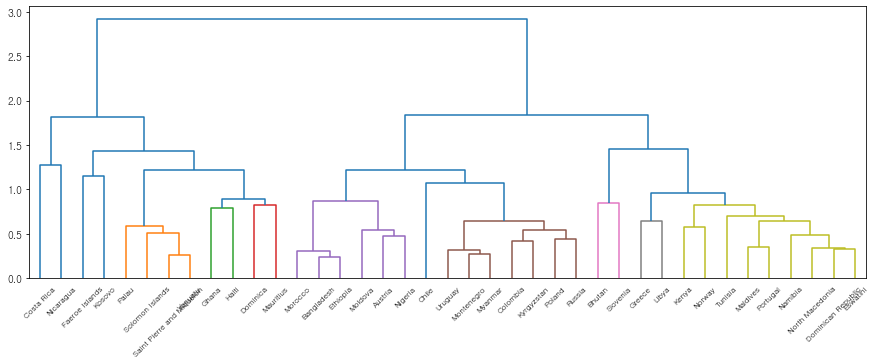

In [159]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
label = acf_df.index
dend1 = sch.linkage(acf_df, method='average',metric='euclidean')
cutoff= 0.3*max(dend1[:,2])
dend_res1 =sch.dendrogram(dend1, color_threshold=cutoff, labels=label)
plt.show()

## 4번 아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라

In [163]:
df = pd.DataFrame({'사회과학':[15,60,24],'자연과학':[25,69,5],'공학':[10,77,13]},
                 index = ['1.5-2.5','2.5-3.5','3.5-4.5'])
df

,사회과학,자연과학,공학
1.5-2.5,15,25,10
2.5-3.5,60,69,77
3.5-4.5,24,5,13


### 4-1.  귀무가설, 연구가설 세우기

1. 귀무가설 : 학과와 성적은 관련이 없다 
2. 연구가설 : 학과와 성적은 관련이 있다

### 4-2. 학과와 성적이 독립일 경우의 기댓값을 구하시오

In [166]:
chi2 , p, dof, expected = stats.chi2_contingency(observed=df)
print(expected)

[[16.61073826 16.61073826 16.77852349]
 [68.43624161 68.43624161 69.12751678]
 [13.95302013 13.95302013 14.09395973]]


### 4-3. 검정통계량 구하고 연구가설의 채택여부 작성

In [168]:
print(p)
print('''
    p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉, 학과와 성적은 관련이 있다.''')

0.00018822647762421383

    p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉, 학과와 성적은 관련이 있다.
